<h1> Digital Signal Processing </h1>

Import Libraries

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


<h2> Sampling and quantization <h2>

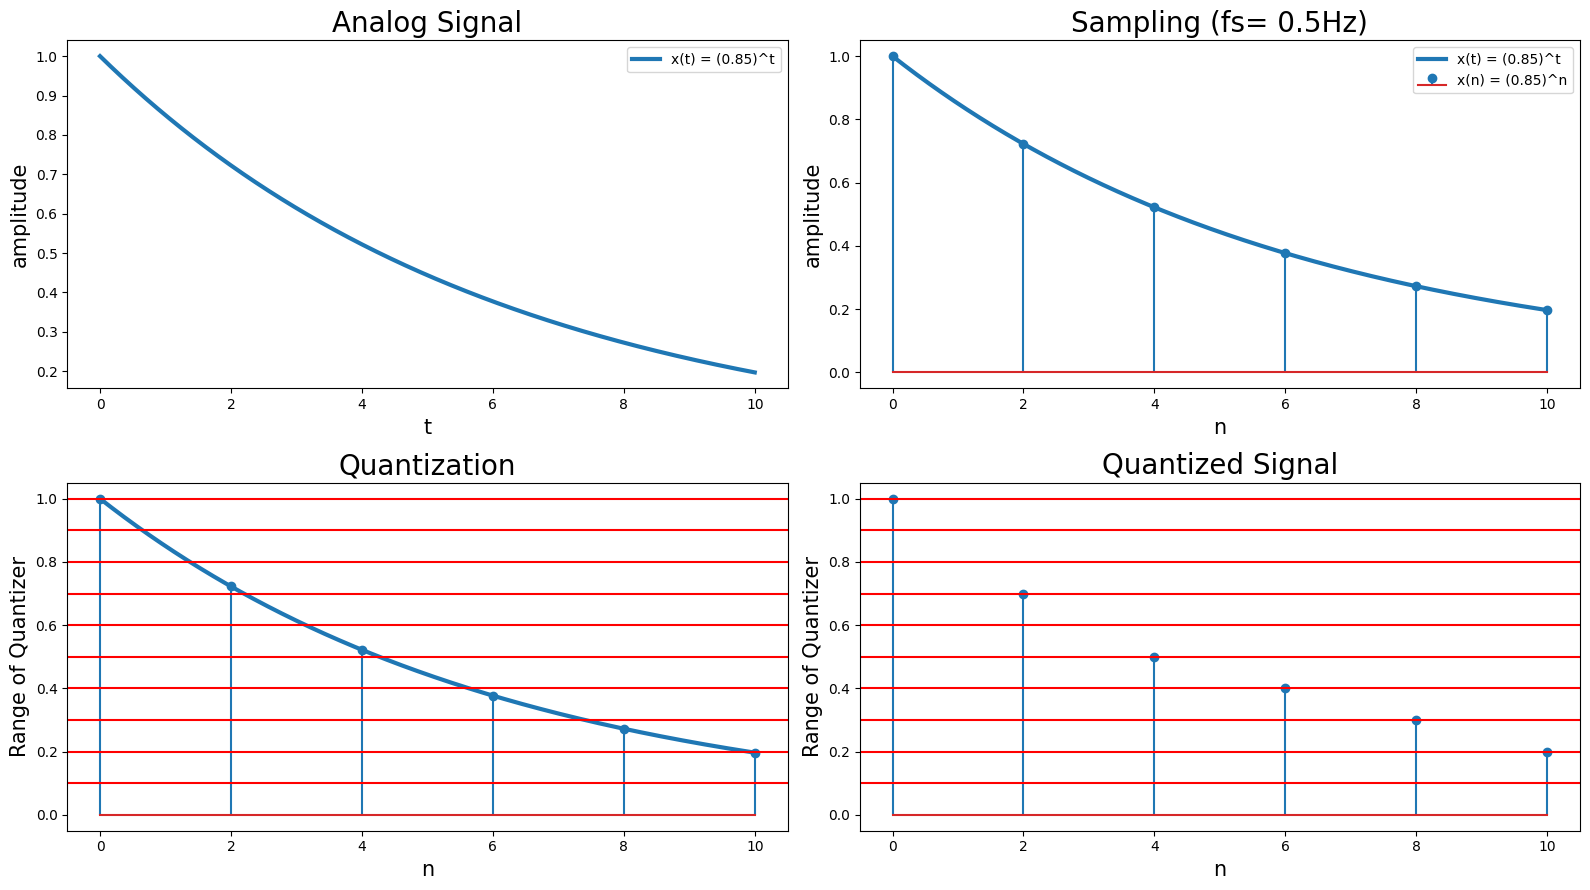

In [3]:
# define a signal
t = np.linspace(0, 10, 1000) #seconds (#this is not really continous!)

# x=(0.85)^t
x = (0.85) ** t 

plt.figure(figsize = (16,9)) # set the size of figure

# 1. Plotting "Analog" Signal
plt.subplot(2, 2, 1)
plt.title('Analog Signal', fontsize=20)
plt.plot(t, x, linewidth=3, label='x(t) = (0.85)^t')
plt.xlabel('t' , fontsize=15)
plt.ylabel('amplitude', fontsize=15)
plt.legend(loc='upper right')

# 2. Sampling and Plotting of Sampled signal

#fs = 1 #Hz
#fs = 2 #Hz
fs = 0.5 #Hz
# define samples
n = np.arange(np.min(t),np.max(t)+1/fs,1/fs)
x_s = (0.85) ** n #exponential signal


plt.subplot(2, 2, 2)
plt.title('Sampling (fs= '+str(fs)+'Hz)', fontsize=20)
plt.plot(t, x, linewidth=3, label='x(t) = (0.85)^t')
plt.stem(n, x_s, label='x(n) = (0.85)^n')
#plt.setp(stemlines, 'linewidth', 3)
plt.xlabel('n' , fontsize = 15)
plt.ylabel('amplitude', fontsize = 15)
plt.legend(loc='upper right')

# 3. Quantization
# let's assume the quantizer range is 0.1 to 1.0 (1 decimal digit)
plt.subplot(2, 2, 3)
plt.title('Quantization', fontsize = 20)
plt.plot(t, x, linewidth =3)
plt.stem(n,x_s)
plt.xlabel('n', fontsize = 15)
plt.ylabel('Range of Quantizer', fontsize=15)
plt.axhline(y = 0.1, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.2, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.3, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.4, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.5, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.6, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.7, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.8, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.9, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 1.0, xmin = 0, xmax = 10, color = 'r')

plt.subplot(2, 2, 4)
plt.title('Quantized Signal', fontsize = 20)
xq = np.around(x_s,1)
plt.stem(n,xq)
plt.xlabel('n', fontsize = 15)
plt.ylabel('Range of Quantizer', fontsize=15)

plt.axhline(y = 0.1, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.2, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.3, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.4, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.5, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.6, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.7, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.8, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 0.9, xmin = 0, xmax = 10, color = 'r')
plt.axhline(y = 1.0, xmin = 0, xmax = 10, color = 'r')

plt.tight_layout()



<h1> EX1 - Quantization errors </h1>

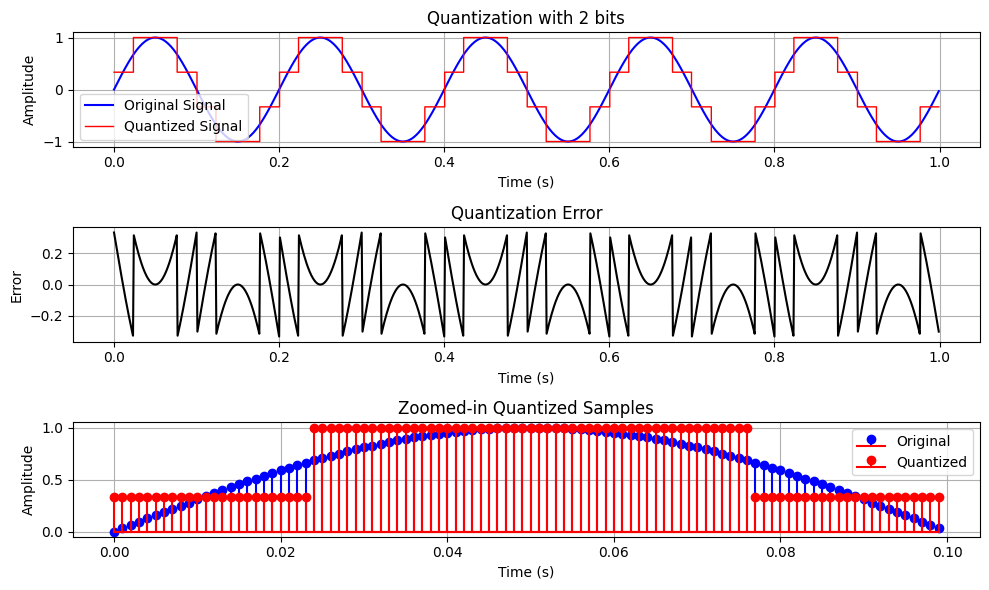

Quantization with 2 bits
Quantization Step Size: 0.666667
Signal-to-Noise Ratio (SNR): 12.22 dB


In [4]:
# Parameters
fs = 1000  # Sampling frequency (Hz)
n = np.arange(0, 1, 1/fs)  # Time vector (1 second)
f = 5  # Signal frequency (Hz)
x = np.sin(2 * np.pi * f * n)  # Original signal

bits = 2  # Number of quantization bits
L = 2 ** bits  # Number of quantization levels
xmin = np.min(x)
xmax = np.max(x)

delta = (xmax - xmin) / (L-1)  # Quantization step size
x_quantized = np.round((x - xmin) / delta) * delta + xmin  # Uniform quantization

# Quantization Error
error = x_quantized - x
SNR = 10 * np.log10(np.mean(x**2) / np.mean(error**2))  # Signal-to-Noise Ratio

# Plot Results
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(n, x, 'b', linewidth=1.5, label='Original Signal')
plt.step(n, x_quantized, 'r', linewidth=1, where='mid', label='Quantized Signal')
plt.legend()
plt.title(f'Quantization with {bits} bits')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, error, 'k', linewidth=1.5)
plt.title('Quantization Error')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.grid()

plt.subplot(3, 1, 3)
plt.stem(n[:fs//10], x[:fs//10], 'b', markerfmt='bo', linefmt='b-', basefmt='r-')
plt.stem(n[:fs//10], x_quantized[:fs//10], 'r', markerfmt='ro', linefmt='r-', basefmt='r-')
plt.legend(['Original', 'Quantized'])
plt.title('Zoomed-in Quantized Samples')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

# Display Results
print(f'Quantization with {bits} bits')
print(f'Quantization Step Size: {delta:.6f}')
print(f'Signal-to-Noise Ratio (SNR): {SNR:.2f} dB')

<h1> FFT </h1>

peak frequency:  4.0 Hz


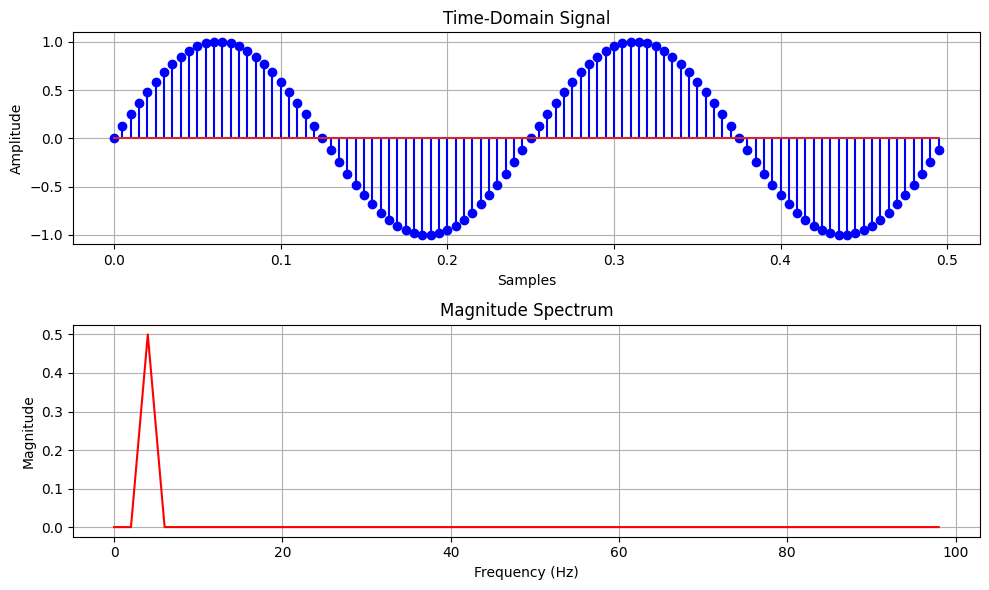

In [5]:
# Parameters
fs = 200  # Sampling frequency (Hz)
T = 0.5  # Signal duration (s)
#N = int(fs*T) # number of samples
n = np.arange(0, T, 1/fs) 
N = len(n) # number of samples
#n = np.linspace(0, T, N, endpoint=False)  # Time vector
f_signal = 4  # Signal frequency (Hz) GOOD
#f_signal = 8  # Signal frequency (Hz) GOOD
#f_signal = 5  # Signal frequency (Hz) Spectral leakege
#f_signal = np.pi  # Signal frequency (Hz) Spectral leakege
x = np.sin(2 * np.pi * f_signal * n)# Original signal
#x = np.sin(2 * np.pi * f_signal * n) + np.sin(2 * np.pi * 8 * n) # Original signal

#windowing (removes side lobes)
#w = signal.windows.hamming(len(x))
#x = x*w

#zero padding
#N_FFT = 200*len(x)
#x = np.concat((x,np.zeros(N_FFT-len(x))),axis=0)
#n = np.linspace(0, fs*len(x), N_FFT, endpoint=False)
# Compute FFT
X = np.fft.fft(x)  # Compute FFT
#alternative
#X = np.fft.fft(x,N_FFT)  # Compute FFT

N_NFT = len(X)
freqs = np.fft.fftfreq(N_NFT, 1/fs)  # Frequency axis

i_max = np.argmax(np.abs(X[:N_NFT//2]))
print('peak frequency: ', freqs[i_max], 'Hz')

# Plot Results
plt.figure(figsize=(10, 6))

# Time Domain Signal
plt.subplot(2, 1, 1)
plt.stem(n, x, 'b')
plt.title('Time-Domain Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid()

# Frequency Domain Magnitude Spectrum
plt.subplot(2, 1, 2)
plt.plot(freqs[:N_NFT//2], np.abs(X[:N_NFT//2]) / N, 'r')
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()
plt.show()

<h1> EX2 - FFT vs STFT </h1>

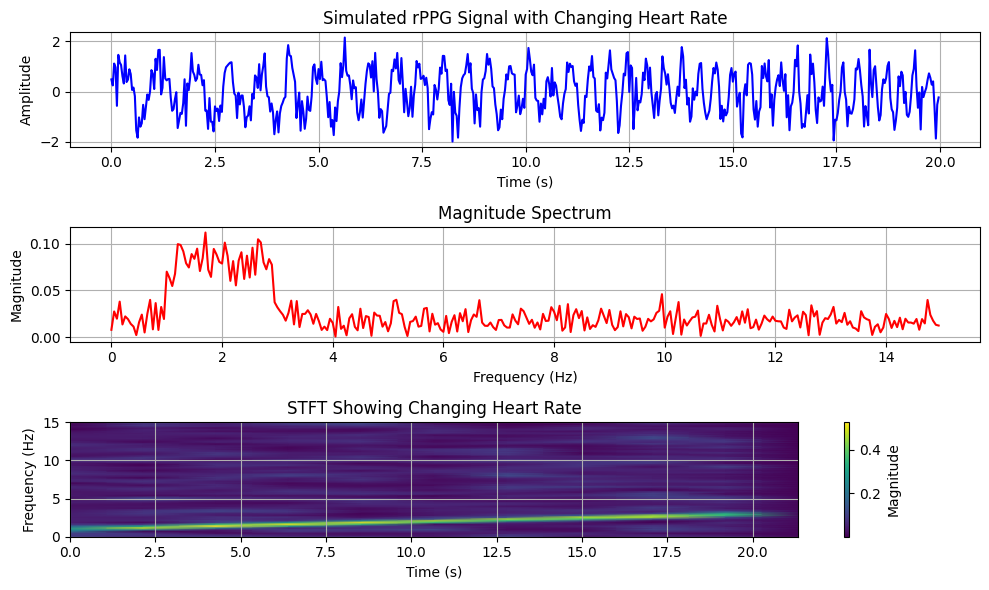

In [6]:
# Parameters
fs = 30  # Sampling frequency (Hz) typical for rPPG
T = 20  # Signal duration (s)
t = np.arange(0, T, 1/fs)
# Simulate heart rate changes (varying frequency)
hr_initial = 60 / 60  # 1 Hz (60 BPM)
hr_final = 120 / 60  # 2 Hz (120 BPM)
hr_t = np.linspace(hr_initial, hr_final, len(t))  # Linearly increasing heart rate
x = np.sin(2 * np.pi * hr_t * t)  # Simulated rPPG signal
x = x + 0.5*np.random.randn(len(x))  # add noise

# FFT
X = np.fft.fft(x)  # Compute FFT
N = len(x)
freqs = np.fft.fftfreq(N, 1/fs)  # Frequency axis

# Compute STFT to observe frequency change
f, t_stft, Zxx = signal.stft(x, fs, nperseg=128)

# Plot Results
plt.figure(figsize=(10, 6))

# Time-Domain Signal
plt.subplot(3, 1, 1)
plt.plot(t, x, 'b')
plt.title('Simulated rPPG Signal with Changing Heart Rate')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()


# Frequency Domain Magnitude Spectrum
plt.subplot(3, 1, 2)
plt.plot(freqs[:N//2], np.abs(X[:N//2]) / N, 'r')
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()


# STFT Magnitude Spectrum
plt.subplot(3, 1, 3)
plt.pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud')
plt.title('STFT Showing Changing Heart Rate')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude')
plt.grid()

plt.tight_layout()
plt.show()

<h2> EX3 - ifft and filtering in the frequency domain </h2>

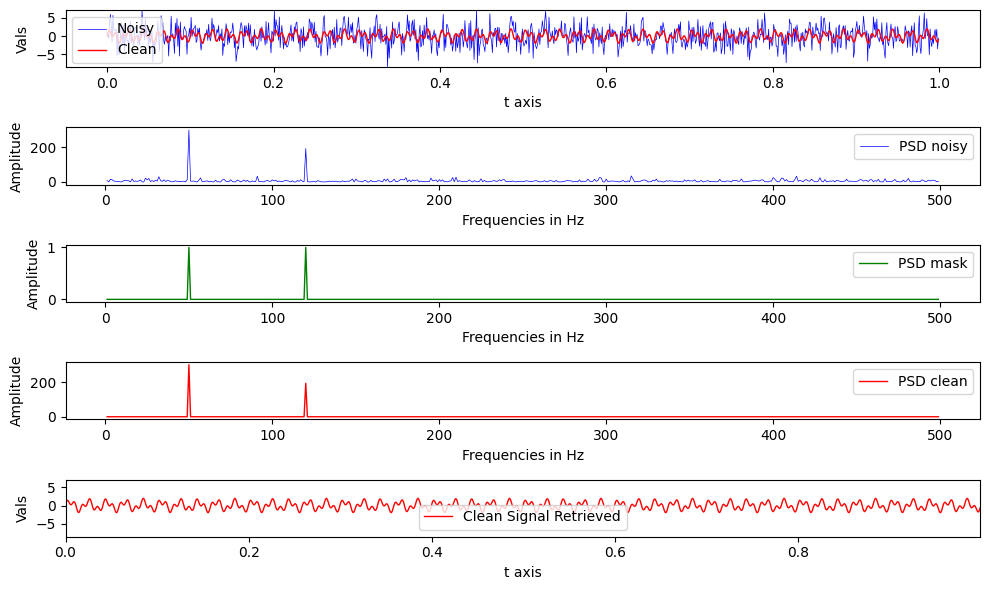

In [7]:
# Create synthetic signal
fs = 1000  
T = 1  # Signal duration (s)
t = np.arange(0, T, 1/fs)
#dt = 0.001
#t = np.arange(0, 1, dt)
signal_clean = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t) # Sum of 2 Sequencies
signal_noisy = signal_clean + 2.5 * np.random.randn(len(t)) # Add some noise
min_signal, max_signal = signal_noisy.min(), signal_noisy.max()

# Compute the Fast Fourier Transform (FFT)
n = len(t)
fhat = np.fft.fft(signal_noisy, n)                 # Compute the FFT
#psd = fhat * np.conj(fhat) / n          
psd = np.abs(fhat)**2 / n          
freq = (1 / T) * np.arange(n)    # frequency array
idxs_half = np.arange(1, np.floor(n / 2), dtype=np.int32)  # first half index

threshold = 100
psd_mask = psd > threshold # array of 0 and 1
psd_clean = psd * psd_mask # zero out all the unnecessary powers
fhat_clean = psd_mask * fhat # used to retreive the signal

signal_filtered = np.fft.ifft(fhat_clean).real # inverse fourier transform

plt.figure(figsize=(10, 6))

# Time-Domain Signal
plt.subplot(5, 1, 1)
plt.plot(t, signal_noisy, color='b', linewidth=0.5, label='Noisy')
plt.plot(t, signal_clean, color='r', linewidth=1, label='Clean')
plt.ylim(min_signal, max_signal)
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(freq[idxs_half], np.abs(psd[idxs_half]), color='b', linewidth=0.5, label='PSD noisy')
plt.xlabel('Frequencies in Hz')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(freq[idxs_half], psd_mask[idxs_half], color='g', linewidth=1, label='PSD mask')
plt.xlabel('Frequencies in Hz')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(freq[idxs_half], np.abs(psd_clean[idxs_half]), color='r', linewidth=1, label='PSD clean')
plt.xlabel('Frequencies in Hz')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(t, signal_filtered, color='r', linewidth=1, label='Clean Signal Retrieved')
plt.xlim(t[0], t[-1])
plt.ylim(min_signal, max_signal)
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.tight_layout()

<h2>Convolutions</h2>

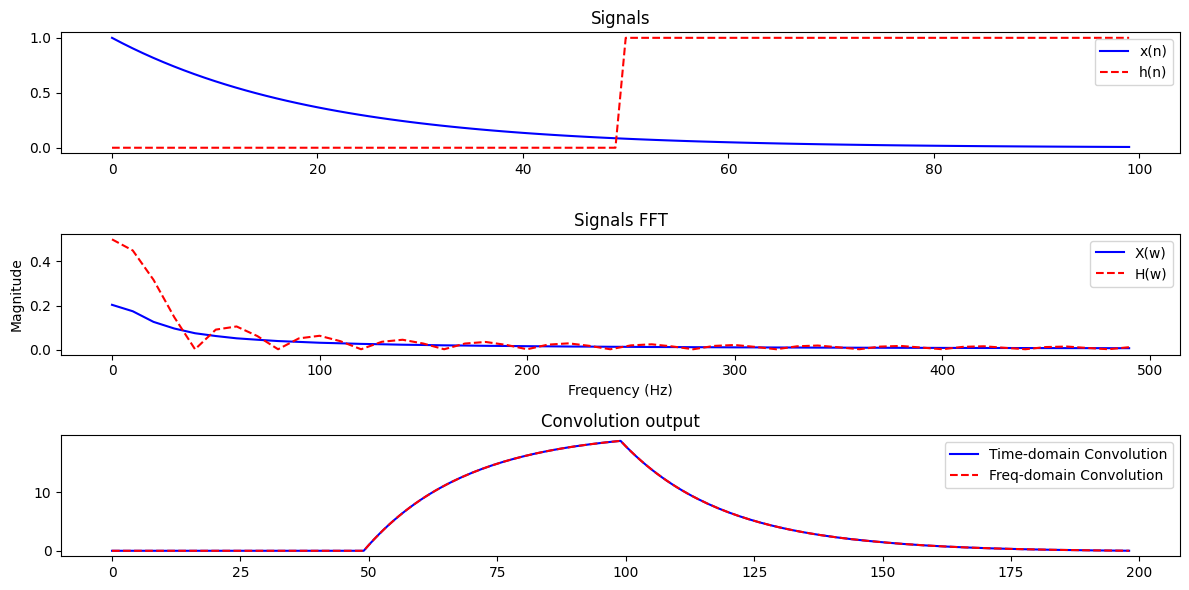

Error between time-domain and frequency-domain convolution: 8.34e-14


In [9]:
import numpy as np
import matplotlib.pyplot as plt


# Define two signals
N = 100
n = np.linspace(0, 1, N, endpoint=False)
x = np.exp(-5 * n)  # Decaying exponential
h = np.heaviside(n - 0.5, 1)  # Step function

# Time-domain convolution
conv_time = np.convolve(x, h, mode='full')

N_FFT = 2*N-1
# Frequency-domain convolution (Convolution Theorem)
X = np.fft.fft(x, n=N_FFT)  # FFT of x
H = np.fft.fft(h, n=N_FFT)  # FFT of y
freqs = np.fft.fftfreq(N, 1/fs)  # Frequency axis
conv_freq = np.fft.ifft(X * H).real  # Multiply in frequency domain, then IFFT


# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(x, label='x(n)', color='b')
plt.plot(h, label='h(n)', color='r', linestyle='dashed')
plt.title('Signals')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(freqs[:N//2], np.abs(X[:N//2]) / N, label='X(w)', color='b')
plt.plot(freqs[:N//2], np.abs(H[:N//2]) / N, label='H(w)', color='r', linestyle='dashed')
plt.title('Signals FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(conv_time, label='Time-domain Convolution', color='b')
plt.plot(conv_freq, label='Freq-domain Convolution', color='r', linestyle='dashed')
plt.title('Convolution output')
plt.legend()

plt.tight_layout()
plt.show()

# Verify similarity
error = np.linalg.norm(conv_time - conv_freq)
print(f'Error between time-domain and frequency-domain convolution: {error:.2e}')


<h2> Filter design </h2>

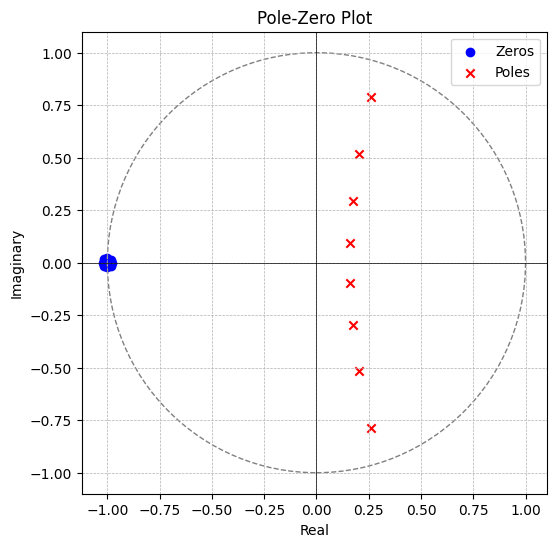

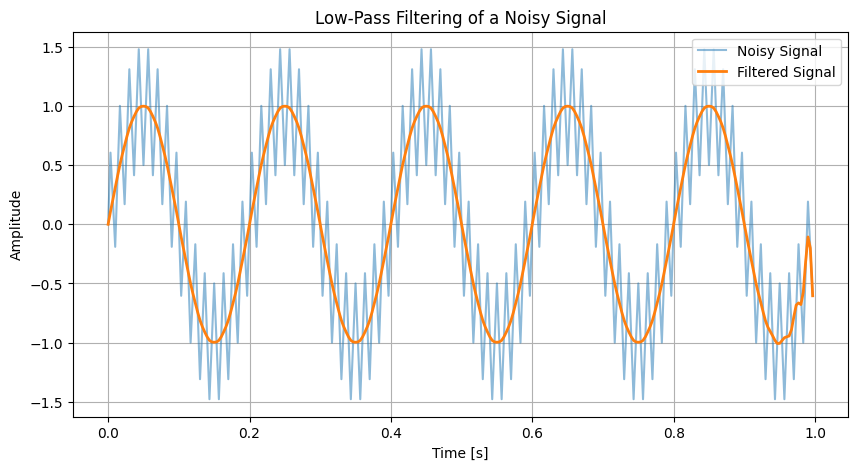

In [10]:
def plot_pz(b, a):
    """ Plot zeros and poles of a filter given its coefficients """
    zeros, poles, _ = signal.tf2zpk(b, a)
    
    plt.figure(figsize=(6, 6))
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--', linewidth=0.5)
    
    plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Zeros')
    plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Poles')
    
    unit_circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='dashed')
    plt.gca().add_patch(unit_circle)
    
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Pole-Zero Plot')
    plt.legend()
    plt.axis('equal')
    plt.show()


# Example: Design a low-pass filter
#zeros = [0.5*np.exp(1j * np.pi)]
#poles = [0.5]
#b = np.poly(zeros)
#a = np.poly(poles)

# Example: Design a high-pass filter
#poles = [0.5*np.exp(1j * np.pi)]
#zeros = [0.5]
#b = np.poly(zeros)
#a = np.poly(poles)

# Example: Design a stop-band filter
#rho = 0.9
#theta = np.pi/2
#poles = [rho*np.exp(1j * theta), rho*np.exp(1j * -theta)]
#zeros = [np.exp(1j * theta), np.exp(1j * -theta)]
#b = np.poly(zeros)
#a = np.poly(poles)



# Example: Design a Butterworth filter
order = 8
cutoff = 300/5  
b, a = signal.butter(order, cutoff, btype='low', analog=False, fs=300)


plot_pz(b, a)


# Generate a sample signal: a sine wave with noise
fs = 300  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # 1-second time vector
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * fs/4 * t)

filtered_signal = signal.filtfilt(b, a, x)

# Plot the original and filtered signals
plt.figure(figsize=(10, 5))
plt.plot(t, x, label="Noisy Signal", alpha=0.5)
plt.plot(t, filtered_signal, label="Filtered Signal", linewidth=2)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Low-Pass Filtering of a Noisy Signal")
plt.grid()
plt.show()




<h2> Exercise: heart rate estimation</h2>

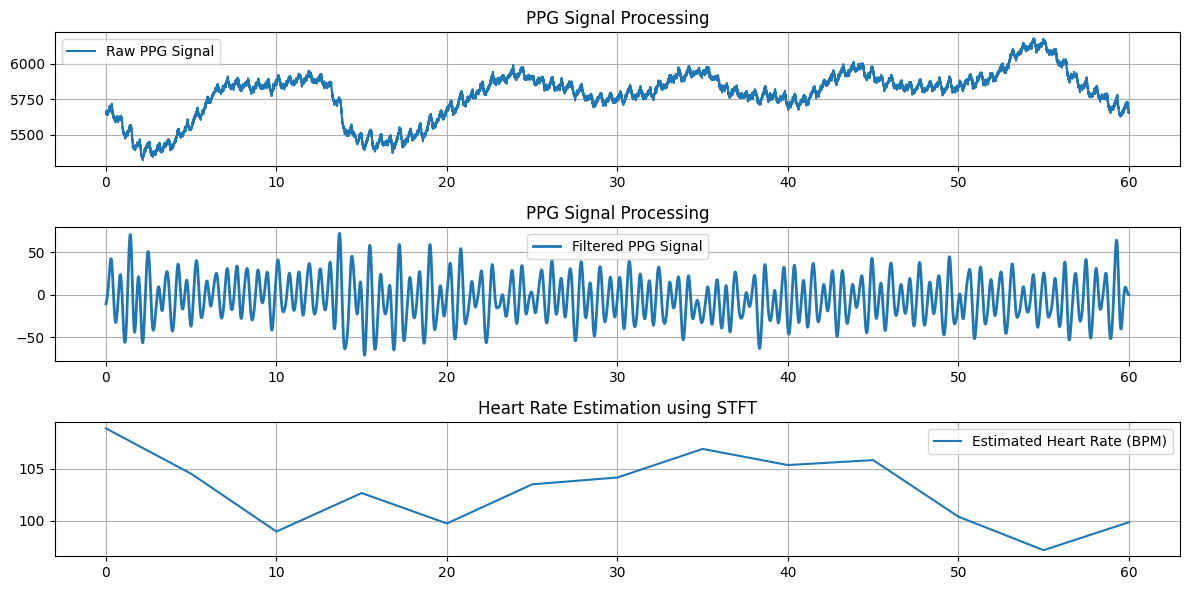

In [11]:
# Load a sample PPG signal (students should replace this with real data)
def load_ppg_signal(filename,fs=100):
    ppg_signal = np.genfromtxt(filename, delimiter=',', skip_header=1)
    t = np.arange(0,len(ppg_signal)/fs, 1/fs)
    return t, ppg_signal

# Bandpass filter function
def bandpass_filter(x, fs, lowcut=0.5, highcut=3, order=2):
    b, a = signal.butter(order, [lowcut, highcut], btype='band', fs = fs)
    return signal.filtfilt(b, a, x)

# STFT for heart rate estimation
def estimate_heart_rate(x, fs):
    segment_length = 10
    f, t, Zxx = signal.stft(x, fs=fs, nperseg=fs*segment_length, nfft=100*fs*segment_length)
    power = np.abs(Zxx) ** 2
    heart_rate_idx = np.argmax(power, axis=0)
    heart_rate = f[heart_rate_idx] * 60  # Convert to BPM
    return t, heart_rate

# Main script
fs = 500  # Sampling frequency
t, raw_ppg = load_ppg_signal('data.csv',fs)
T = 60
t = t[:fs*T]
raw_ppg = raw_ppg[:fs*T]
filtered_ppg = bandpass_filter(raw_ppg, fs=fs, order=4)

time_hr, heart_rate = estimate_heart_rate(filtered_ppg, fs)

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, raw_ppg, label='Raw PPG Signal')
plt.legend()
plt.grid()
plt.title('PPG Signal Processing')

plt.subplot(3, 1, 2)
plt.plot(t, filtered_ppg, label='Filtered PPG Signal', linewidth=2)
plt.legend()
plt.grid()
plt.title('PPG Signal Processing')

plt.subplot(3, 1, 3)
plt.plot(time_hr, heart_rate, label='Estimated Heart Rate (BPM)')
plt.legend()
plt.grid()
plt.title('Heart Rate Estimation using STFT')

plt.tight_layout()
plt.show()
